In [128]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import shutil


In [129]:
root_path = r'C:\Users\swapn\OneDrive\Desktop\K-fold_DATA'

In [130]:
source_files = []
class_labels = ['cataract', 'diabetic_retinopathy', 'glaucoma','normal']
X = []
Y = []

img_rows, img_cols = 224, 224  # input image dimensions
train_path = os.path.join(root_path, 'train')
validation_path = os.path.join(root_path, 'validation')
test_path = os.path.join(root_path, 'test')

Displaying images from C:\Users\swapn\OneDrive\Desktop\K-fold_DATA\train:


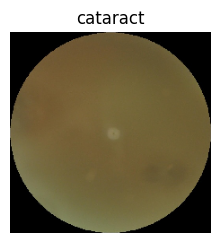

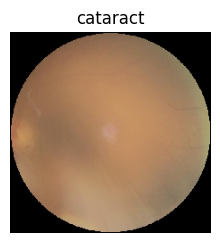

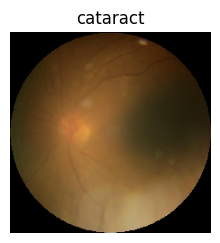

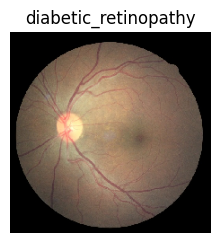

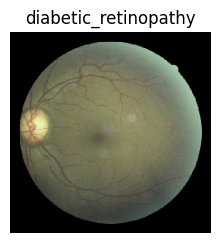

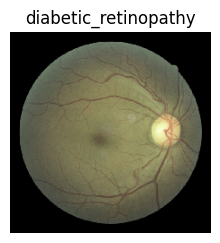

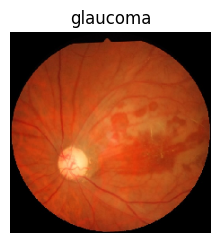

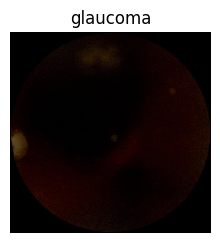

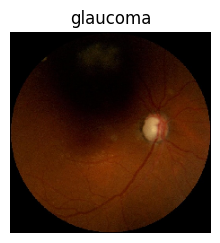

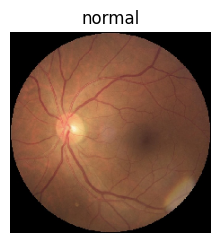

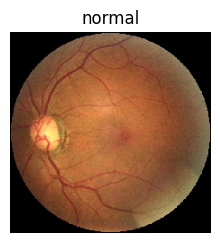

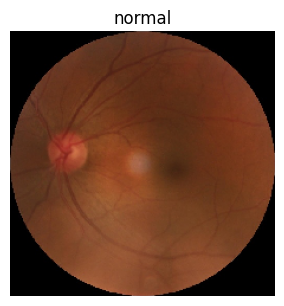

In [131]:

from tensorflow.keras.preprocessing import image

# Function to display some images from sub-folders present inside a given folder
def display_images_from_folder(folder_path):
    print(f"Displaying images from {folder_path}:")
    
    # Get the list of class folders
    class_folders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]

    for class_folder in class_folders:
        class_path = os.path.join(folder_path, class_folder)
        image_files = [f for f in os.listdir(class_path) if f.endswith('.jpg') or f.endswith('.png') or f.endswith('.jpeg')]

        # Display num_images from each class folder
        for i in range(min(3, len(image_files))):
            img_path = os.path.join(class_path, image_files[i])
            img = image.load_img(img_path, target_size=(img_rows, img_cols))
            
            plt.figure(figsize=(12, 12))
            plt.subplot(len(class_folders), 3, len(class_folders) * i + (class_folders.index(class_folder) + 1))
            plt.imshow(img)
            plt.title(class_folder)
            plt.axis('off')

    plt.tight_layout()
    plt.show()

# Display images from the 'train' folder
display_images_from_folder(train_path)


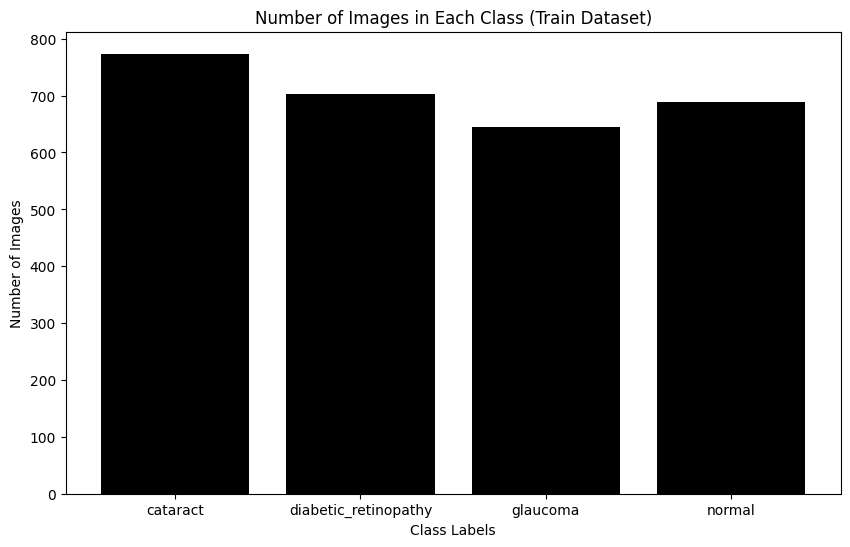

In [132]:
import os
import matplotlib.pyplot as plt

#Counts the number of images present in each class from the train folder
def count_images_per_class(folder_path):
    class_folders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]
    num_images_per_class = []

    for class_folder in class_folders:
        class_path = os.path.join(folder_path, class_folder)
        image_files = [f for f in os.listdir(class_path) if f.endswith('.jpg') or f.endswith('.png')  or f.endswith('.jpeg')]
        num_images_per_class.append(len(image_files))

    return class_folders, num_images_per_class

train_class_folders, train_num_images = count_images_per_class(train_path)

plt.figure(figsize=(10, 6))
plt.bar(train_class_folders, train_num_images, color='black')
plt.xlabel('Class Labels')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Class (Train Dataset)')
plt.show()


In [133]:
def transfer_between_folders(source, dest, split_rate):
    global source_files
    source_files = os.listdir(source)
    if(len(source_files) != 0):
        transfer_file_numbers = int(len(source_files)*split_rate)
        transfer_index = random.sample(
            range(0, len(source_files)), transfer_file_numbers)
        for each_index in transfer_index:
            shutil.move(os.path.join(source, str(source_files[each_index])), os.path.join(
                dest, str(source_files[each_index])))

    else:
        print("No file moved. Source empty!")


def transfer_all_class_between_folders(source, dest, split_rate):
    for label in class_labels:
        transfer_between_folders(os.path.join(root_path, source, label),
                                 os.path.join(
                                     root_path, dest, label),
                                 split_rate)


def my_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    f1_Score = f1_score(y_true, y_pred, average='weighted')
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1_Score))
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    return accuracy, precision, f1_Score

In [138]:
transfer_all_class_between_folders('test', 'train', 1.0)#check to ensure that the test folder is empty initially,if not images are transferred to the train folder.

No file moved. Source empty!


In [ ]:

transfer_all_class_between_folders('validation', 'train', 1.0)

No file moved. Source empty!
No file moved. Source empty!
No file moved. Source empty!
No file moved. Source empty!


In [ ]:
transfer_all_class_between_folders('train', 'test', 0.20)

In [ ]:
def prepare_name_with_labels(folder_name, dataset_type='train'):
   
    source_files = os.listdir(os.path.join(root_path, dataset_type, folder_name))
    y_label = 0
    for i in range(len(class_labels)):
        if(folder_name == class_labels[i]):
            y_label = i
    for val in source_files:
        X.append(val)
        Y.append(y_label)

In [ ]:
# Organize file names and class labels in X and Y variables
for i in range(len(class_labels)):
    prepare_name_with_labels(class_labels[i])


In [ ]:
X = np.asarray(X)
Y = np.asarray(Y)

In [ ]:
batch_size = 32
epoch = 20
num_of_channels = 3
number_of_class_labels = len(class_labels)

In [ ]:
def get_model():
    activation_function = 'relu'

    model = Sequential()
    model.add(Conv2D(64, (3, 3), padding='same',
                     activation=activation_function, input_shape=(img_rows, img_cols, num_of_channels)))
    model.add(Conv2D(64, (3, 3), activation=activation_function))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(32, (3, 3), padding='same',
                     activation=activation_function))
    model.add(Conv2D(32, (3, 3), activation=activation_function))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(16, (3, 3), padding='same',
                     activation=activation_function))
    model.add(Conv2D(16, (3, 3), activation=activation_function))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(64, activation=activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(32, activation=activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(16, activation=activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(number_of_class_labels, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    model.summary() 

    return model

model=get_model()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_19 (Conv2D)          (None, 222, 222, 64)      36928     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 111, 111, 64)      0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 111, 111, 64)      0         
                                                                 
 conv2d_20 (Conv2D)          (None, 111, 111, 32)      18464     
                                                                 
 conv2d_21 (Conv2D)          (None, 109, 109, 32)      9248      
                                                      

No file moved. Source empty!
No file moved. Source empty!
No file moved. Source empty!
No file moved. Source empty!
Results for fold 1
Found 2809 images belonging to 4 classes.
Found 703 images belonging to 4 classes.
Epoch 1/20
88/88 [==============================] - 164s 2s/step - loss: 1.3571 - accuracy: 0.2944
Epoch 2/20
88/88 [==============================] - 160s 2s/step - loss: 1.2861 - accuracy: 0.3635
Epoch 3/20
88/88 [==============================] - 159s 2s/step - loss: 1.2362 - accuracy: 0.4119
Epoch 4/20
88/88 [==============================] - 159s 2s/step - loss: 1.1992 - accuracy: 0.4090
Epoch 5/20
88/88 [==============================] - 165s 2s/step - loss: 1.1718 - accuracy: 0.4617
Epoch 6/20
88/88 [==============================] - 164s 2s/step - loss: 1.1192 - accuracy: 0.4899
Epoch 7/20
88/88 [==============================] - 154s 2s/step - loss: 1.0616 - accuracy: 0.5329
Epoch 8/20
88/88 [==============================] - 440s 5s/step - loss: 1.0107 - accurac

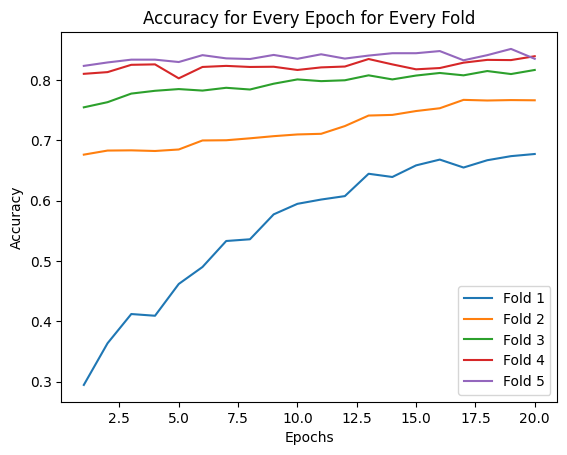

Found 876 images belonging to 4 classes.
28/28 [==============================] - 35s 1s/step
Test data
Accuracy  : 0.7990867579908676
Precision : 0.8110154214917179
f1Score : 0.7939165046755737
[[179  35  13  15]
 [  0 206   0  13]
 [ 27   1 118  55]
 [  7   4   6 197]]


In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True)
skf.get_n_splits(X, Y)
test_datagen = ImageDataGenerator(rescale=1./255)
fold_num = 0
all_fold_acc = []
for train_index, val_index in skf.split(X, Y):
    # First cut all images from validation to train (if any exists)
    transfer_all_class_between_folders('validation', 'train', 1.0)
    fold_num += 1
    print("Results for fold", fold_num)
    X_train, X_val = X[train_index], X[val_index]
    Y_train, Y_val = Y[train_index], Y[val_index]
    for each_index in range(len(X_val)):
        class_label = ''
        for i in range(len(class_labels)):
            if(Y_val[each_index] == i):
                class_label = class_labels[i]
        shutil.move(os.path.join(root_path, 'train', class_label, X_val[each_index]),
                    os.path.join(root_path, 'validation', class_label, X_val[each_index]))

    train_datagen = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.20,
        fill_mode="nearest")
    validation_datagen = ImageDataGenerator(rescale=1./255)
    test_datagen = ImageDataGenerator(rescale=1./255)

    # Start ImageClassification Model
    train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        subset='training')

    validation_generator = validation_datagen.flow_from_directory(
        validation_path,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode=None,  
        shuffle=False)

  
    fold_acc = []
    
    # fit model
    history = model.fit(train_generator,
                        epochs=20)
    
    fold_acc.extend(history.history['accuracy'])

    predictions = model.predict(validation_generator, verbose=1)
    y_predictions = np.argmax(predictions, axis=1)
    true_classes = validation_generator.classes
    
    # evaluate validation performance
    print("Validation data")
    val_acc, val_prec, val_fScore = my_metrics(true_classes, y_predictions)
    all_fold_acc.append(fold_acc)

for i, fold_acc in enumerate(all_fold_acc):
    plt.plot(range(1, len(fold_acc) + 1), fold_acc, label=f'Fold {i+1}')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy for Every Epoch for Every Fold')
plt.show()

# Perform test data processing after the cross-validation loop
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_rows, img_cols),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

# Now you can use test_generator for evaluating test performance
test_predictions = model.predict(test_generator, verbose=1)
y_test_predictions = np.argmax(test_predictions, axis=1)
true_test_classes = test_generator.classes
    
# Evaluate test performance
print("Test data")
test_acc, test_prec, test_fScore = my_metrics(true_test_classes, y_test_predictions)



In [ ]:
model.save("K-fold.tf")

INFO:tensorflow:Assets written to: K-fold.tf\assets


INFO:tensorflow:Assets written to: K-fold.tf\assets


In [ ]:
loaded_model = tf.keras.models.load_model('K-fold.tf')

In [ ]:
from tensorflow.keras.preprocessing import image
import pandas as pd
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array


image_path = r'C:\Users\swapn\Downloads\glaucoma_sample.jpg'  

# Preprocess the image
processed_image = preprocess_image(image_path)
predictions = loaded_model.predict(processed_image)
disease_labels = ['glaucoma', 'cataract', 'normal', 'diabetic_retinopathy']
df_predict = pd.DataFrame(predictions)
max_values_per_row = df_predict.idxmax(axis=1)
m = [disease_labels[i] for i in max_values_per_row]
print(m)

1/1 [==============================] - 0s 41ms/step
['glaucoma']


<AxesSubplot: >

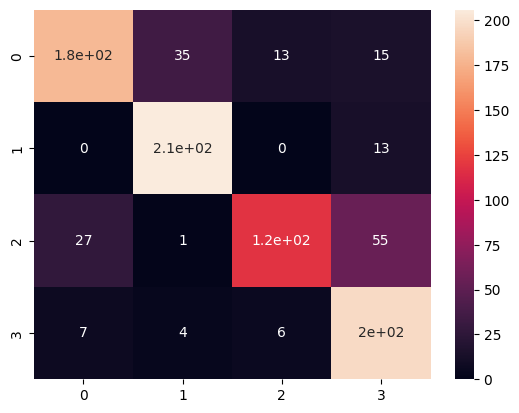

In [137]:
import seaborn as sns
cm=confusion_matrix(true_test_classes, y_test_predictions)
sns.heatmap(cm, annot=True)